<a href="https://colab.research.google.com/github/IshaqKHATTAK/Computer-Vision/blob/main/Copy_of_Geometric_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

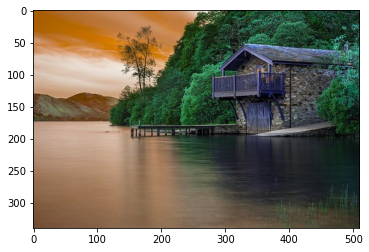

In [ ]:
img = cv.imread('/content/lake.jpg')
plt.imshow(img)

### scale (resize)

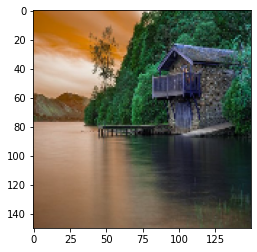

In [ ]:
#resize while using the height and width
resized = cv.resize(img,(150,150))
plt.imshow(resized)

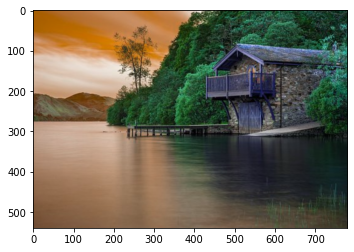

In [ ]:
stretch_near = cv.resize(img, (780, 540),interpolation = cv.INTER_LINEAR)
plt.imshow(stretch_near)

### rotation

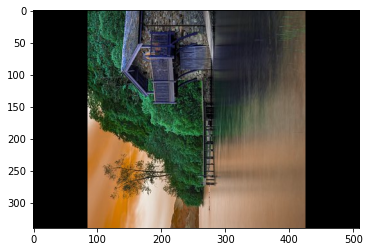

In [ ]:
height,width= img.shape[:2]

center = (width/2, height/2)
rotate_matrix = cv.getRotationMatrix2D(center=center, angle=90, scale=1)

rotated_image = cv.warpAffine(
    src=img, M=rotate_matrix, dsize=(width, height))

plt.imshow(rotated_image)

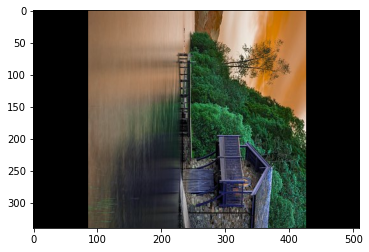

In [ ]:
height,width= img.shape[:2]

center = (width/2, height/2)
rotate_matrix = cv.getRotationMatrix2D(center=center, angle=-90, scale=1)

rotated_image = cv.warpAffine(
    src=img, M=rotate_matrix, dsize=(width, height))

plt.imshow(rotated_image)

### translation

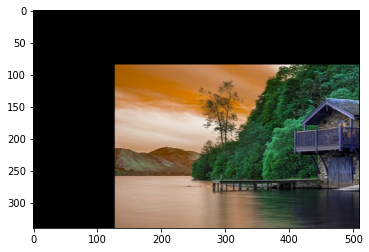

In [ ]:
height,width= img.shape[:2]

trans_mtrx = np.float32([[1,0,width/4],[0,1,height/4]])
rotated_image = cv.warpAffine(img, trans_mtrx, (width, height))

plt.imshow(rotated_image)

#The first row [1, 0, width/4] defines a translation in the x direction by width/4 pixels.
# This means that the image will be shifted right by width/4 pixels.

#The second row [0, 1, height/4] defines a translation in the y direction by height/4 pixels. 
#  This means that the image will be shifted down by height/4 pixels.

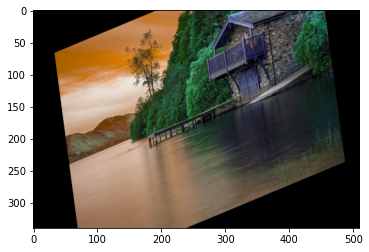

In [ ]:
height,width= img.shape[:2]
pts1 = np.float32([[50, 50],
                   [200, 50],
                   [50, 200]])
 
pts2 = np.float32([[80, 100],
                   [200, 50],
                   [100, 250]])
M = cv.getAffineTransform(pts1, pts2)
dst = cv.warpAffine(img, M, (width, height))
plt.imshow(dst)

### perspective transformation

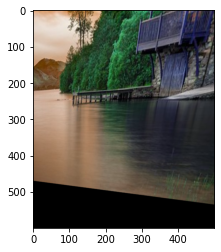

In [ ]:
    # Locate points of the documents
    # or object which you want to transform
pts1 = np.float32([[56, 65], [340, 100],
                       [28, 400], [340, 360]])
pts2 = np.float32([[0, 0], [400, 0],
                       [0, 540], [300, 540]])
        # Apply Perspective Transform Algorithm
matrix = cv.getPerspectiveTransform(pts1, pts2)
result = cv.warpPerspective(img, matrix, (500, 600))

plt.imshow(result)